<a href="https://colab.research.google.com/github/IvanMaiurnikov/tik5_2/blob/main/tik_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the string to compute Huffman Code: aaaa    bbbbbbbbbb


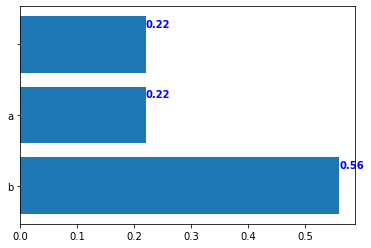

Entropy of the code: 2.905194
 Char | Huffman code 
----------------------
 'b'  |           1
 'a'  |          10
 ' '  |          11
Average length of the code: 0.880000
Efficiency of the code: 3.301357


In [29]:
import math
import sys
import matplotlib.pyplot as plt
from collections import Counter
global probabilities
global bar_graphs
probabilities = []
bar_graphs = []
class HuffmanCode:
    def __init__(self,probability, entropy):
        self.probability = probability
        self.entropy_of_code = entropy
    def position(self, value, index):
        for j in range(len(self.probability)):
            if(value >= self.probability[j]):
                return j
        return index-1

    def characteristics_huffman_code(self, code):
        length_of_code = [len(k) for k in code]

        mean_length = sum([a*b for a, b in zip(length_of_code, self.probability)])

        print("Average length of the code: %f" % mean_length)
        print("Efficiency of the code: %f" % (self.entropy_of_code/mean_length))

    def compute_code(self):
        num = len(self.probability)
        huffman_code = ['']*num

        for i in range(num-2):
            val = self.probability[num-i-1] + self.probability[num-i-2]
            if(huffman_code[num-i-1] != '' and huffman_code[num-i-2] != ''):
                huffman_code[-1] = ['1' + symbol for symbol in huffman_code[-1]]
                huffman_code[-2] = ['0' + symbol for symbol in huffman_code[-2]]
            elif(huffman_code[num-i-1] != ''):
                huffman_code[num-i-2] = '0'
                huffman_code[-1] = ['1' + symbol for symbol in huffman_code[-1]]
            elif(huffman_code[num-i-2] != ''):
                huffman_code[num-i-1] = '1'
                huffman_code[-2] = ['0' + symbol for symbol in huffman_code[-2]]
            else:
                huffman_code[num-i-1] = '1'
                huffman_code[num-i-2] = '0'

            position = self.position(val, i)
            probability = self.probability[0:(len(self.probability) - 2)]
            probability.insert(position, val)
            if(isinstance(huffman_code[num-i-2], list) and isinstance(huffman_code[num-i-1], list)):
                complete_code = huffman_code[num-i-1] + huffman_code[num-i-2]
            elif(isinstance(huffman_code[num-i-2], list)):
                complete_code = huffman_code[num-i-2] + [huffman_code[num-i-1]]
            elif(isinstance(huffman_code[num-i-1], list)):
                complete_code = huffman_code[num-i-1] + [huffman_code[num-i-2]]
            else:
                complete_code = [huffman_code[num-i-2], huffman_code[num-i-1]]

            huffman_code = huffman_code[0:(len(huffman_code)-2)]
            huffman_code.insert(position, complete_code)

        huffman_code[0] = ['0' + symbol for symbol in huffman_code[0]]
        huffman_code[1] = ['1' + symbol for symbol in huffman_code[1]]

        if(len(huffman_code[1]) == 0):
            huffman_code[1] = '1'

        count = 0
        final_code = ['']*num

        for i in range(2):
            for j in range(len(huffman_code[i])):
                final_code[count] = huffman_code[i][j]
                count += 1

        final_code = sorted(final_code, key=len)
        return final_code

def entropy(str_in):
        f_list=[]
        p_list=[]
        k = len(str_in)                        #Кількість символів
        f_list = Counter(str_in).most_common() #відсортуємо за допомогою most_common()
        m = len(f_list)                        #Потужність алфавіту - кількість різноманітних символів в тексті
        i_sym         = math.ceil(math.log2(m))
        ent = 0
        idx=0
        for el in f_list:
            p_list.append(float("{:.2f}".format(el[1]/k)))
            ent -= (p_list[0]) * (math.log2(el[1]/k))
            idx += 1
        return p_list, f_list, ent

string = input("Enter the string to compute Huffman Code: ")

freq = {}
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

probabilities, freq, ent=entropy(string)
'''
plt.barh(range(len(freq)), [val[1] for val in freq], align='center')
plt.yticks(range(len(freq)), [val[0] for val in freq])
plt.yticks(rotation=0)
for i, v in enumerate(freq):
    plt.text(v[1] + 0.05, i + .25, str(v[1]), color='blue', fontweight='bold')
plt.show()
'''
#draw bar graph of probabilities
plt.barh(range(len(probabilities)), [val for val in probabilities], align='center')
plt.yticks(range(len(freq)), [val[0] for val in freq])
plt.yticks(rotation=0)
for i, v in enumerate(probabilities):
    plt.text(v + 0.0001, i + .25, str(v), color='blue', fontweight='bold')
plt.show()

length = len(string)

print("Entropy of the code: %f" %(ent))

huffmanClassObject = HuffmanCode(probabilities, ent)
huffman_code = huffmanClassObject.compute_code()

print(' Char | Huffman code ')
print('----------------------')

for id,char in enumerate(freq):
    if huffman_code[id]=='':
        print(' %-4r |%12s' % (char[0], 1))
        continue
    print(' %-4r |%12s' % (char[0], huffman_code[id]))

huffmanClassObject.characteristics_huffman_code(huffman_code)